In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import exposure
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    H = None
    W = None
    
    def __init__(self, image, clusters, size = 250):
        self.CLUSTERS = clusters
        self.IMAGE = image
        self.SIZE = (size, size)
    
    def dominantColors(self):
    
        #open image
        img = cv2.imread(self.IMAGE)
        self.H, self.W, c = img.shape
        
        #convert to RGB from BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        #adjusting the contrast
        p2, p98 = np.percentile(img, (0, 100))
        img = exposure.rescale_intensity(img, in_range=(p2, p98))
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #getting the colors as per dominance order
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        return self.COLORS.astype(int)
                
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        
    def plotImg(self):
        center = np.uint8(self.COLORS)
        result = center[self.LABELS.flatten()]
        img = result.reshape((self.H, self.W, 3))
        img = cv2.GaussianBlur(img,(5,5),0)
        plt.figure()
        plt.axis("off")
        plt.imshow(img)
        plt.show()
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite('BlankFlag.png', img)

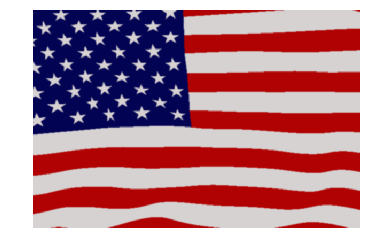

In [3]:
img = 'USA.jpg'
clusters = 3
dc = DominantColors(img, clusters)
colors = dc.dominantColors()
#dc.plotHistogram()
dc.plotImg()